In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as krs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from Solver.SolverSWCC import *
from Solver.BimodalSWCC import *
import seaborn as sns
import keras_tuner as kt

In [2]:
bim = BimodalSWCC()

x_value = 10**np.linspace(-2, 6, 200)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
def normData(x, min_x, max_x, d1 = -1, d2 = 1):
    return ((x - min_x)*(d2-d1))/(max_x-min_x) + d1

def invnormData(x, min_x, max_x, d1 = -1, d2 = 1):
    return ((x-d1)*(max_x-min_x))/(d2-d1)+min_x

In [14]:
df_data = pd.read_excel('BD_GO_Solos v8.xlsx', sheet_name='RNA', header=1)

In [15]:
df_data.tail()

,CG - com defloculante,CG - sem defloculante,CCSA,% Pedregulho cd,% Areia cd,% Silte cd,% Argila cd,% Pedregulho sd,% Areia sd,% Silte sd,...,LP,IP,yb1_bim,yres1_bim,Sres1_bim,yb2_bim,Sb_bim,yres2_bim,Sres2_bim,a_bim
52,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_1_2_UFG_Dissertação_Diemer (2014),0.0,0.451167,0.265518,0.283315,0.0,0.612188,0.387812,...,0.197,0.151,0.262639,13.384280,0.415714,224.284749,0.414714,37486.755364,0.011205,0.022091
53,6_1_0_UFG_Dissertação_Diemer (2014),6_2_0_UFG_Dissertação_Diemer (2014),6_1_1_UFG_Dissertação_Diemer (2014),0.0,0.611363,0.172658,0.215979,0.0,0.719253,0.280747,...,0.382,0.090,4.500000,48.825915,0.473067,327.369530,0.472067,19404.039344,0.010000,0.020000
54,6_1_2_UFG_Dissertação_Diemer (2014),6_2_2_UFG_Dissertação_Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.0,0.609855,0.172732,0.217413,0.0,0.720008,0.279992,...,0.153,0.134,0.500000,14.000000,0.350000,500.000000,0.279798,2750.000000,0.095000,0.020000
55,6_1_3_UFG_Dissertação_Diemer (2014),6_2_3_UFG_Dissertação_Diemer (2014),6_1_4_UFG_Dissertação_Diemer (2014),0.0,0.557404,0.207608,0.234988,0.0,0.651524,0.348476,...,0.178,0.111,1.010717,10.014076,0.505002,4110.106911,0.215879,13404.455488,0.010000,0.020000
56,6_1_4_UFG_Dissertação_Diemer (2014),6_2_4_UFG_Dissertação_Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.0,0.558020,0.206650,0.235330,0.0,0.652199,0.276333,...,0.191,0.194,50.000000,120.000000,0.479311,2066.447979,0.478311,12742.076221,0.086584,0.060000


In [16]:
#coleta dos dados

#cg = df_data[['% Pedregulho', '% Areia', '% Silte', '% Argila']].values

#ccsa_bim = df_data[['yb1_bim', 'yres1_bim', 'Sres1_bim', 'yb2_bim', 'Sb_bim', 'yres2_bim', 'Sres2_bim', 'a_bim']].values

dataset = df_data[['CG - com defloculante', 'CG - sem defloculante', 'CCSA', '% Areia cd', '% Silte cd', '% Argila cd', '% Areia sd', '% Silte sd', '% Argila sd', 'LL', 'IP', 'yb1_bim', 'yres1_bim', 'Sres1_bim', 'yb2_bim', 'Sb_bim', 'yres2_bim', 'Sres2_bim', 'a_bim']]

dataset.tail()

,CG - com defloculante,CG - sem defloculante,CCSA,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,yb1_bim,yres1_bim,Sres1_bim,yb2_bim,Sb_bim,yres2_bim,Sres2_bim,a_bim
52,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_1_2_UFG_Dissertação_Diemer (2014),0.451167,0.265518,0.283315,0.612188,0.387812,0.000000,0.348,0.151,0.262639,13.384280,0.415714,224.284749,0.414714,37486.755364,0.011205,0.022091
53,6_1_0_UFG_Dissertação_Diemer (2014),6_2_0_UFG_Dissertação_Diemer (2014),6_1_1_UFG_Dissertação_Diemer (2014),0.611363,0.172658,0.215979,0.719253,0.280747,0.000000,0.472,0.090,4.500000,48.825915,0.473067,327.369530,0.472067,19404.039344,0.010000,0.020000
54,6_1_2_UFG_Dissertação_Diemer (2014),6_2_2_UFG_Dissertação_Diemer (2014),6_1_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.000000,0.287,0.134,0.500000,14.000000,0.350000,500.000000,0.279798,2750.000000,0.095000,0.020000
55,6_1_3_UFG_Dissertação_Diemer (2014),6_2_3_UFG_Dissertação_Diemer (2014),6_1_4_UFG_Dissertação_Diemer (2014),0.557404,0.207608,0.234988,0.651524,0.348476,0.000000,0.289,0.111,1.010717,10.014076,0.505002,4110.106911,0.215879,13404.455488,0.010000,0.020000
56,6_1_4_UFG_Dissertação_Diemer (2014),6_2_4_UFG_Dissertação_Diemer (2014),6_1_5_UFG_Dissertação_Diemer (2014),0.558020,0.206650,0.235330,0.652199,0.276333,0.071468,0.385,0.194,50.000000,120.000000,0.479311,2066.447979,0.478311,12742.076221,0.086584,0.060000


In [17]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.tail()

,CG - com defloculante,CG - sem defloculante,CCSA,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,yb1_bim,yres1_bim,Sres1_bim,yb2_bim,Sb_bim,yres2_bim,Sres2_bim,a_bim
12,16_1_6_UnB_Tese_Jesus (2013),16_2_6_UnB_Tese_Jesus (2013),16_1_6_UnB_Tese_Jesus (2013),0.317000,0.400000,0.185000,0.618000,0.284000,0.000000,0.42,0.13,81.157616,134.671810,0.617873,403.360791,0.616873,2435.208154,0.174971,0.05
43,10_1_1_UnB_Tese_Ayala (2020),10_2_1_UnB_Tese_Ayala (2020),10_1_1_UnB_Tese_Ayala (2020),0.513055,0.214210,0.272735,0.838328,0.161672,0.000000,0.39,0.10,10.697903,25.668843,0.800921,14747.498092,0.630937,32521.867173,0.119988,0.08
24,18_1_8_UnB_Tese_Luiz (2012),18_2_8_UnB_Tese_Luiz (2012),18_1_8_UnB_Tese_Luiz (2012),0.182463,0.105671,0.711867,0.533398,0.161636,0.304956,0.39,0.12,3.000000,7.000000,0.548304,12472.785594,0.257598,20500.000000,0.050000,0.03
6,14_2_1_UnB_Tese_Borges (2014),14_1_1_UnB_Tese_Borges (2014),14_1_1_UnB_Tese_Borges (2014),0.448120,0.184927,0.366953,0.621780,0.378054,0.000000,0.42,0.18,1.060118,8.415074,0.499439,2036.708307,0.445034,17801.044180,0.060654,0.08
23,18_1_7_UnB_Tese_Luiz (2012),18_2_7_UnB_Tese_Luiz (2012),18_1_7_UnB_Tese_Luiz (2012),0.075376,0.072247,0.852377,0.571746,0.134923,0.292726,0.40,0.12,4.215397,9.996345,0.494592,7028.169052,0.355508,11819.079743,0.096256,0.02


In [18]:
test_dataset

,CG - com defloculante,CG - sem defloculante,CCSA,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,yb1_bim,yres1_bim,Sres1_bim,yb2_bim,Sb_bim,yres2_bim,Sres2_bim,a_bim
0,21_1_2_UnB_Dissertação_Lopera (2016),21_2_2_UnB_Dissertação_Lopera (2016),21_1_2_UnB_Dissertação_Lopera (2016),0.180643,0.345368,0.444685,0.310083,0.507601,0.153012,0.240,0.050,15.354915,860.576224,0.354162,12271.700178,0.353162,15500.000000,0.067644,0.080000
3,17_1_2_UnB_Tese_Farias (2012),17_2_2_UnB_Tese_Farias (2012),17_1_2_UnB_Tese_Farias (2012),0.030000,0.189000,0.781000,0.713000,0.287000,0.000000,0.400,0.130,0.150000,8.980805,0.427708,8500.000000,0.297673,20000.000000,0.010012,0.080000
9,15_1_6_UnB_Tese_Carvalho (2013),15_2_6_UnB_Tese_Carvalho (2013),15_1_6_UnB_Tese_Carvalho (2013),0.706178,0.262565,0.000000,0.706178,0.262565,0.000000,0.360,0.360,13.000000,19.281297,0.825828,183.110787,0.653892,588.186739,0.113037,0.030000
19,18_1_3_UnB_Tese_Luiz (2012),18_2_3_UnB_Tese_Luiz (2012),18_1_3_UnB_Tese_Luiz (2012),0.098536,0.132311,0.769153,0.490050,0.169992,0.339959,0.400,0.140,2.897204,9.908788,0.503797,9274.243952,0.386405,24862.348486,0.010863,0.020000
21,18_1_5_UnB_Tese_Luiz (2012),18_2_5_UnB_Tese_Luiz (2012),18_1_5_UnB_Tese_Luiz (2012),0.124630,0.125076,0.750294,0.582210,0.157955,0.259140,0.350,0.100,2.500000,10.220431,0.550000,5889.247417,0.310000,29570.623584,0.011042,0.020000
36,2_2_1_UFG_Dissertação_Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.000000,0.340,0.160,0.802065,16.570526,0.648902,105.266249,0.647902,1185.256643,0.173178,0.020000
39,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_0_2_UFG_Dissertação_Diemer (2014),0.451167,0.265518,0.283315,0.612188,0.387812,0.000000,0.350,0.120,0.578028,34.116014,0.370688,998.605069,0.369688,54872.765745,0.010000,0.020000
44,6_1_2_UFG_Dissertação_Diemer (2014),6_2_2_UFG_Dissertação_Diemer (2014),6_0_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.000000,0.287,0.134,2.359351,12.221833,0.391530,2989.033823,0.259491,3900.000000,0.150000,0.020000
47,4_1_1_UFG_Dissertação_Gomes (2015),4_2_1_UFG_Dissertação_Gomes (2015),4_1_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.000000,0.348,0.151,0.181490,42.678589,0.371751,6340.457638,0.368736,10580.305781,0.049409,0.080000
52,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_1_2_UFG_Dissertação_Diemer (2014),0.451167,0.265518,0.283315,0.612188,0.387812,0.000000,0.348,0.151,0.262639,13.384280,0.415714,224.284749,0.414714,37486.755364,0.011205,0.022091


In [19]:
rnaTrain = train_dataset[train_dataset.columns[3:]]

inputRNA_train = rnaTrain.iloc[:, 0:8].values

outputRNA_trainSuc = np.log(rnaTrain.iloc[:, [8,9, 11, 13]]).values

outputRNA_trainSat = rnaTrain.iloc[:, [10, 12, 14]].values

In [20]:
#outputRNA_trainSat.to_excel("Sat.xlsx")

RNA 1 - SUCÇÃO

In [21]:
## Prepração dos dados ##

max_valueSuc = np.max(outputRNA_trainSuc)

listOutput1 = np.asarray(outputRNA_trainSuc)/max_valueSuc


In [113]:
### REDE INICIAL - MACROPORO ###

krs.backend.clear_session()

class PrintDot(krs.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')


krs.backend.clear_session()

model_bim_suc1 = krs.models.Sequential() #configuration of ANN

model_bim_suc1.add(krs.layers.Dense(6, input_dim=8, activation='tanh', use_bias=True)) #hidden layer
model_bim_suc1.add(krs.layers.Dense(8, activation='relu'))
model_bim_suc1.add(krs.layers.Dense(4, activation='linear')) #output layer
model_bim_suc1.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae', 'mse']) #error = mean squared error
history_suc = model_bim_suc1.fit(inputRNA_train, listOutput1, validation_split=0.2,
              epochs=700, callbacks=[PrintDot()]) #execute ANN callbacks=[self.monitor]

Epoch 1/700
2/2 [==============================] - 2s 335ms/step - loss: 0.2670 - mae: 0.4555 - mse: 0.2670 - val_loss: 0.2302 - val_mae: 0.4259 - val_mse: 0.2302
Epoch 2/700
2/2 [==============================] - 0s 66ms/step - loss: 0.2480 - mae: 0.4394 - mse: 0.2480 - val_loss: 0.2170 - val_mae: 0.4133 - val_mse: 0.2170
Epoch 3/700
2/2 [==============================] - 0s 59ms/step - loss: 0.2344 - mae: 0.4266 - mse: 0.2344 - val_loss: 0.2069 - val_mae: 0.4029 - val_mse: 0.2069
Epoch 4/700
2/2 [==============================] - 0s 55ms/step - loss: 0.2239 - mae: 0.4163 - mse: 0.2239 - val_loss: 0.1988 - val_mae: 0.3942 - val_mse: 0.1988
Epoch 5/700
2/2 [==============================] - 0s 50ms/step - loss: 0.2155 - mae: 0.4076 - mse: 0.2155 - val_loss: 0.1919 - val_mae: 0.3862 - val_mse: 0.1919
Epoch 6/700
2/2 [==============================] - 0s 54ms/step - loss: 0.2081 - mae: 0.3996 - mse: 0.2081 - val_loss: 0.1852 - val_mae: 0.3783 - val_mse: 0.1852
Epoch 7/700
2/2 [==========

In [114]:
model_bim_suc1.save('ModeloRNA_bim_suc_v5')

INFO:tensorflow:Assets written to: ModeloRNA_bim_suc_v5\assets


In [5]:
model_bim_suc1 = krs.models.load_model('ModeloRNA_bim_suc_v5')

In [6]:
model_bim_suc1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [25]:
plt.plot(history_suc.history['mse'], label="mse")
plt.plot(history_suc.history['val_mse'], label="val_mse")

plt.xlabel("epochs")
plt.ylabel("mse")

plt.legend()

pd.DataFrame(history_suc.history).to_excel("TreinamentoBimodal-history.xlsx")

NameError: name 'history_suc' is not defined

In [22]:
inputTest = test_dataset.iloc[:,3:11]

testPrev1 = model_bim_suc1.predict(inputTest)
trainPrev1 = model_bim_suc1.predict(inputRNA_train)

2/2 [==============================] - 0s 0s/step


In [42]:
model_bim_suc1.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 6) dtype=float32, numpy=
 array([[-0.4624147 ,  0.51924074,  0.48264015,  0.4867262 ,  0.0341647 ,
          0.3476504 ],
        [ 0.32694298, -0.07408825, -0.5020462 , -0.04694524,  0.34547186,
          0.47756618],
        [ 0.12929717, -0.50595605, -0.01098625,  0.5740248 , -0.3377081 ,
         -0.11387805],
        [-0.74406624, -0.41657227, -0.6126194 , -0.10184332,  0.01249109,
          0.01017289],
        [-0.32473934, -0.25140297, -0.28712222, -0.4791577 ,  0.5567786 ,
         -0.07217176],
        [-0.08415228, -0.05998111,  0.58608   ,  0.3452919 , -0.4308887 ,
          0.45415515],
        [-0.31124684, -0.19738494,  0.5865707 , -0.38359576,  0.38079152,
         -0.12960441],
        [-0.3603215 ,  0.58098775,  0.12886451, -0.04353437, -0.04798067,
          0.48771188]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.21759254, -0.04481942,  0.06638173, -0.03836906,  0.14410803,
     

In [9]:
def plotGrafico(var, id_, base_test, prev_test, xlabel, ylabel, dir):

    fig, ax = plt.subplots(figsize=(4,4))

    value = np.concatenate((np.log(base_test[var].values), (prev_test*max_valueSuc)[:,id_]))

    r2 = metrics.r2_score(np.log(base_test[var].values), (prev_test*max_valueSuc)[:,id_])

    ax.scatter(np.log(base_test[var].values), (prev_test*max_valueSuc)[:,id_], color='black', zorder=3, label=f'R² = {r2:.3f}')

    ax.set_xlim(np.trunc(np.min(value)), np.trunc(np.max(value))+1)
    ax.set_ylim(np.trunc(np.min(value)), np.trunc(np.max(value))+1)

    xy = np.linspace(np.trunc(np.min(value)), np.trunc(np.max(value))+1, 20)

    ax.plot(xy, xy, color='black')

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
 
    plt.legend(fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax.grid("both")

    fig.savefig(dir)

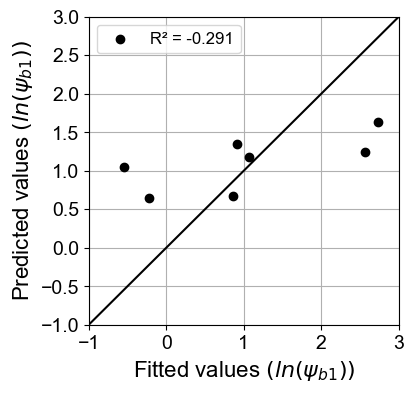

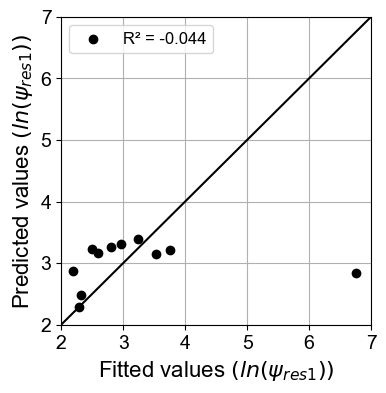

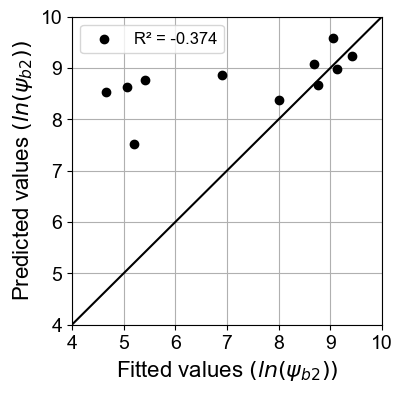

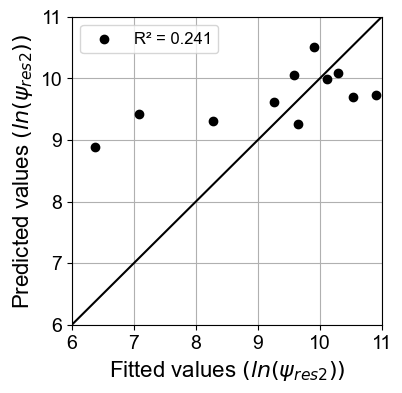

In [17]:
plotGrafico("yb1_bim", 0, test_dataset, testPrev1, r'Fitted values $(ln(\psi_{b1}))$', r'Predicted values $(ln(\psi_{b1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_yb1.svg')
plotGrafico("yres1_bim", 1, test_dataset, testPrev1, r'Fitted values $(ln(\psi_{res1}))$', r'Predicted values $(ln(\psi_{res1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_yres1.svg')
plotGrafico("yb2_bim", 2, test_dataset, testPrev1, r'Fitted values $(ln(\psi_{b2}))$', r'Predicted values $(ln(\psi_{b2}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_yb2.svg')
plotGrafico("yres2_bim", 3, test_dataset, testPrev1, r'Fitted values $(ln(\psi_{res2}))$', r'Predicted values $(ln(\psi_{res2}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_yres2.svg')

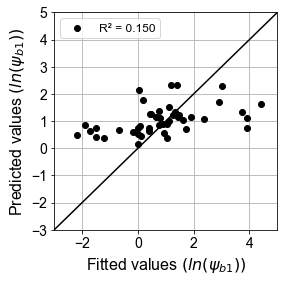

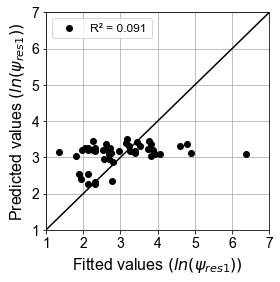

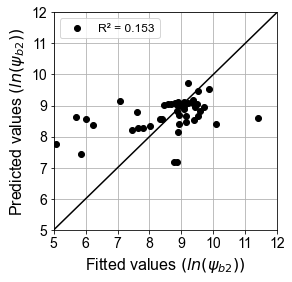

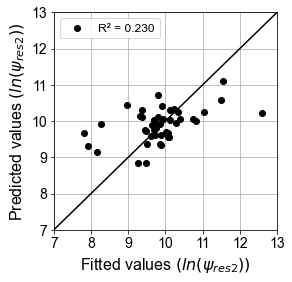

In [16]:
plotGrafico("yb1_bim", 0, train_dataset, trainPrev1, r'Fitted values $(ln(\psi_{b1}))$', r'Predicted values $(ln(\psi_{b1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_yb1.svg')
plotGrafico("yres1_bim", 1, train_dataset, trainPrev1, r'Fitted values $(ln(\psi_{res1}))$', r'Predicted values $(ln(\psi_{res1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_yres1.svg')
plotGrafico("yb2_bim", 2, train_dataset, trainPrev1, r'Fitted values $(ln(\psi_{b2}))$', r'Predicted values $(ln(\psi_{b2}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_yb2.svg')
plotGrafico("yres2_bim", 3, train_dataset, trainPrev1, r'Fitted values $(ln(\psi_{res2}))$', r'Predicted values $(ln(\psi_{res2}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_yres2.svg')

RNA 3 - PREVISÃO SAT

In [23]:
outputRNA_trainSat

array([[0.46294125, 0.26088728, 0.05225782],
       [0.72767525, 0.51851236, 0.07744601],
       [0.65      , 0.46955984, 0.05993691],
       [0.57600228, 0.57500228, 0.01      ],
       [0.53753818, 0.29873558, 0.010058  ],
       [0.46163308, 0.23663369, 0.01005057],
       [0.85      , 0.8       , 0.2       ],
       [0.47931097, 0.47831097, 0.086584  ],
       [0.55270779, 0.41723606, 0.04690797],
       [0.50500209, 0.21587907, 0.01      ],
       [0.66793485, 0.66693485, 0.1       ],
       [0.7       , 0.6       , 0.25      ],
       [0.29559657, 0.29459657, 0.01      ],
       [0.33097994, 0.32997994, 0.01      ],
       [0.69946728, 0.69846728, 0.01000237],
       [0.37175146, 0.36873559, 0.04940938],
       [0.43714187, 0.43614185, 0.01      ],
       [0.743414  , 0.742414  , 0.12285026],
       [0.31958078, 0.31      , 0.01      ],
       [0.36974904, 0.2       , 0.01      ],
       [0.62725652, 0.53887179, 0.02014665],
       [0.5315287 , 0.5305287 , 0.09527664],
       [0.

In [122]:
### REDE INICIAL ###

krs.backend.clear_session()

class PrintDot(krs.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')


krs.backend.clear_session()

model_bim_sat1 = krs.models.Sequential() #configuration of ANN
model_bim_sat1.add(krs.layers.Dense(6, input_dim=8, activation='tanh', use_bias=True)) #hidden layer
model_bim_sat1.add(krs.layers.Dense(8, activation='relu'))
model_bim_sat1.add(krs.layers.Dense(3, activation='linear')) #output layer
model_bim_sat1.compile(loss='mean_squared_error', optimizer='RMSProp', metrics=['mae', 'mse']) #error = mean squared error
history_sat = model_bim_sat1.fit(inputRNA_train, outputRNA_trainSat, validation_split=0.2,
              epochs=700, callbacks=[PrintDot()]) #execute ANN callbacks=[self.monitor]

Epoch 1/700
2/2 [==============================] - 1s 156ms/step - loss: 0.4032 - mae: 0.5354 - mse: 0.4032 - val_loss: 0.3420 - val_mae: 0.4940 - val_mse: 0.3420
Epoch 2/700
2/2 [==============================] - 0s 25ms/step - loss: 0.3590 - mae: 0.5024 - mse: 0.3590 - val_loss: 0.3159 - val_mae: 0.4732 - val_mse: 0.3159
Epoch 3/700
2/2 [==============================] - 0s 28ms/step - loss: 0.3323 - mae: 0.4814 - mse: 0.3323 - val_loss: 0.2957 - val_mae: 0.4566 - val_mse: 0.2957
Epoch 4/700
2/2 [==============================] - 0s 27ms/step - loss: 0.3113 - mae: 0.4645 - mse: 0.3113 - val_loss: 0.2776 - val_mae: 0.4405 - val_mse: 0.2776
Epoch 5/700
2/2 [==============================] - 0s 28ms/step - loss: 0.2925 - mae: 0.4479 - mse: 0.2925 - val_loss: 0.2647 - val_mae: 0.4291 - val_mse: 0.2647
Epoch 6/700
2/2 [==============================] - 0s 25ms/step - loss: 0.2791 - mae: 0.4364 - mse: 0.2791 - val_loss: 0.2523 - val_mae: 0.4178 - val_mse: 0.2523
Epoch 7/700
2/2 [==========

In [18]:
plt.plot(history_sat.history['mse'], label="mse")
plt.plot(history_sat.history['val_mse'], label="val_mse")

plt.xlabel("epochs")
plt.ylabel("mse")

plt.legend()

pd.DataFrame(history_suc.history).to_excel("TreinamentoBimodalSat-history.xlsx")

NameError: name 'history_sat' is not defined

In [124]:
model_bim_sat1.save('ModeloRNA_bim_sat_v5')

INFO:tensorflow:Assets written to: ModeloRNA_bim_sat_v5\assets


In [10]:
model_bim_sat1 = krs.models.load_model('ModeloRNA_bim_sat_v5')

In [11]:
model_bim_sat1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_bim_sat1.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 6) dtype=float32, numpy=
 array([[ 0.35957575, -0.09781273,  0.30344608,  0.56512964, -0.06740998,
          0.17541918],
        [-0.260768  ,  0.58447766,  0.4352856 , -0.0716624 , -0.19414355,
         -0.48853526],
        [ 0.26219895,  0.0373487 ,  0.63848937, -0.33901203, -0.43470952,
         -0.09928873],
        [-0.07197388, -0.01811506, -0.65530103, -0.12945779,  0.4633973 ,
         -0.34361812],
        [ 0.07052764, -0.48150703,  0.16635771,  0.4705903 ,  0.18067032,
          0.03217474],
        [-0.21187621, -0.00628034, -0.61166614,  0.2802396 ,  0.8519204 ,
         -0.14229736],
        [-0.46429002,  0.4854104 , -0.11342737,  0.5023974 ,  0.6524802 ,
         -0.35231316],
        [-0.20127073,  0.41799977, -0.49182117, -0.1701476 , -0.3533037 ,
          0.38254458]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.10060961, -0.11209323, -0.0965373 , -0.02329757,  0.12718977,
     

In [82]:
x = np.tanh(np.matmul(np.concatenate((model_bim_suc1.weights[0], [model_bim_suc1.weights[1]]), axis=0).T, np.asarray([0.611, 0.173,0.216,0.719,0.281,0,0.472,0.09,1]).reshape(9,1)))

def relu(x):
    return(np.maximum(0, x))

x = relu(np.matmul(np.concatenate((model_bim_suc1.weights[2], [model_bim_suc1.weights[3]]), axis=0).T, np.concatenate((x,np.asarray([[1]])), axis=0)))

np.matmul(np.concatenate((model_bim_suc1.weights[4], [model_bim_suc1.weights[5]]), axis=0).T, np.concatenate((x,np.asarray([[1]])), axis=0))

array([[0.03214427],
       [0.26930945],
       [0.68541137],
       [0.79854085]])

In [81]:
relu(x)

array([[0.6515693 ],
       [0.96915482],
       [0.        ],
       [0.03552996],
       [0.        ],
       [0.13710909],
       [0.        ],
       [0.        ]])

In [74]:
x.shape

(6, 1)

In [63]:
model_bim_suc1.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 6) dtype=float32, numpy=
 array([[-0.4624147 ,  0.51924074,  0.48264015,  0.4867262 ,  0.0341647 ,
          0.3476504 ],
        [ 0.32694298, -0.07408825, -0.5020462 , -0.04694524,  0.34547186,
          0.47756618],
        [ 0.12929717, -0.50595605, -0.01098625,  0.5740248 , -0.3377081 ,
         -0.11387805],
        [-0.74406624, -0.41657227, -0.6126194 , -0.10184332,  0.01249109,
          0.01017289],
        [-0.32473934, -0.25140297, -0.28712222, -0.4791577 ,  0.5567786 ,
         -0.07217176],
        [-0.08415228, -0.05998111,  0.58608   ,  0.3452919 , -0.4308887 ,
          0.45415515],
        [-0.31124684, -0.19738494,  0.5865707 , -0.38359576,  0.38079152,
         -0.12960441],
        [-0.3603215 ,  0.58098775,  0.12886451, -0.04353437, -0.04798067,
          0.48771188]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.21759254, -0.04481942,  0.06638173, -0.03836906,  0.14410803,
     

In [40]:
model_bim_sat1.predict(test_dataset[10:].iloc[:,3:11].values)

1/1 [==============================] - 0s 26ms/step


array([[0.5098139 , 0.42928684, 0.05181403]], dtype=float32)

In [25]:
inputTest = test_dataset.iloc[:,3:11]

testPrev2 = model_bim_sat1.predict(inputTest)
trainPrev2 = model_bim_sat1.predict(inputRNA_train)

2/2 [==============================] - 0s 1ms/step


In [26]:
def plotGrafico(var, id_, base_test, prev_test, xlabel, ylabel, dir):

    fig, ax = plt.subplots(figsize=(4,4))

    value = np.concatenate((base_test[var].values, prev_test[:,id_]))

    r2 = metrics.r2_score(base_test[var].values, prev_test[:,id_])

    ax.scatter(base_test[var].values, prev_test[:,id_], color='black', zorder=3, label=f'R² = {r2:.3f}')

    ax.set_xlim(0, .3)
    ax.set_ylim(0, .3)

    xy = np.linspace(0, .3, 5)

    ax.plot(xy, xy, color='black')

    ax.set_xticks([0, 0.1, 0.2, 0.3])
    ax.set_yticks([0, 0.1, 0.2, 0.3])

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
 
    plt.legend(fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax.grid("both")

    fig.savefig(dir)

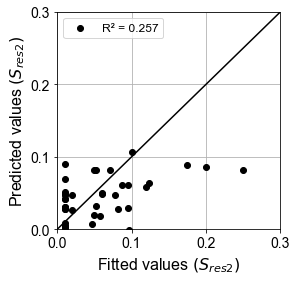

In [29]:
"""plotGrafico("Sres1_bim", 0, train_dataset, trainPrev2, r'Fitted values $(S_{res1}))$', r'Predicted values $(S_{res1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_Sres1.svg')
#plotGrafico("Sb_bim", 1, train_dataset, trainPrev2, r'Fitted values $(S_{b}))$', r'Predicted values $(S_{b}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_Sb.svg')"""


plotGrafico("Sres2_bim", 2, train_dataset, trainPrev2, r'Fitted values $(S_{res2})$', r'Predicted values $(S_{res2})$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTrain_Sres2.svg')

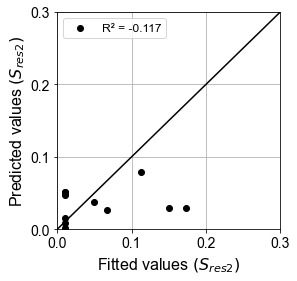

In [30]:
'''plotGrafico("Sres1_bim", 0, test_dataset, testPrev2, r'Fitted values $(S_{res1}))$', r'Predicted values $(S_{res1}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_Sres1.svg')
plotGrafico("Sb_bim", 1, test_dataset, testPrev2, r'Fitted values $(S_{b}))$', r'Predicted values $(S_{b}))$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_Sb.svg')'''

plotGrafico("Sres2_bim", 2, test_dataset, testPrev2, r'Fitted values $(S_{res2})$', r'Predicted values $(S_{res2})$', 
'Versões RNA/BIM/artigo/figures/v2/GraphTest_Sres2.svg')

Análise da rede

In [27]:
sucTeste = np.exp(testPrev1*max_valueSuc)

In [50]:
dic = {"código":test_dataset["CCSA"].values,
    "yb1":sucTeste[:,0],
    "yres1":sucTeste[:,1],
    "sres1":testPrev2[:,0],
    "yb2":sucTeste[:,2],
    "sb":testPrev2[:,1],
    "yres2":sucTeste[:,3],
    "sres2":testPrev2[:,2],
    "a":np.ones(len(testPrev1[:,0]))*0.05
}

predValues = pd.DataFrame(dic).values

dfResults = pd.DataFrame(dic)

In [51]:
coef = test_dataset.iloc[:, 11:].values

work_id = test_dataset['CCSA'].values

points_ccsa = pd.read_excel('BD_GO_Solos v8.xlsx', sheet_name='CCSA')


In [52]:
test_dataset

,CG - com defloculante,CG - sem defloculante,CCSA,% Areia cd,% Silte cd,% Argila cd,% Areia sd,% Silte sd,% Argila sd,LL,IP,yb1_bim,yres1_bim,Sres1_bim,yb2_bim,Sb_bim,yres2_bim,Sres2_bim,a_bim
0,21_1_2_UnB_Dissertação_Lopera (2016),21_2_2_UnB_Dissertação_Lopera (2016),21_1_2_UnB_Dissertação_Lopera (2016),0.180643,0.345368,0.444685,0.310083,0.507601,0.153012,0.240,0.050,15.354915,860.576224,0.354162,12271.700178,0.353162,15500.000000,0.067644,0.080000
3,17_1_2_UnB_Tese_Farias (2012),17_2_2_UnB_Tese_Farias (2012),17_1_2_UnB_Tese_Farias (2012),0.030000,0.189000,0.781000,0.713000,0.287000,0.000000,0.400,0.130,0.150000,8.980805,0.427708,8500.000000,0.297673,20000.000000,0.010012,0.080000
9,15_1_6_UnB_Tese_Carvalho (2013),15_2_6_UnB_Tese_Carvalho (2013),15_1_6_UnB_Tese_Carvalho (2013),0.706178,0.262565,0.000000,0.706178,0.262565,0.000000,0.360,0.360,13.000000,19.281297,0.825828,183.110787,0.653892,588.186739,0.113037,0.030000
19,18_1_3_UnB_Tese_Luiz (2012),18_2_3_UnB_Tese_Luiz (2012),18_1_3_UnB_Tese_Luiz (2012),0.098536,0.132311,0.769153,0.490050,0.169992,0.339959,0.400,0.140,2.897204,9.908788,0.503797,9274.243952,0.386405,24862.348486,0.010863,0.020000
21,18_1_5_UnB_Tese_Luiz (2012),18_2_5_UnB_Tese_Luiz (2012),18_1_5_UnB_Tese_Luiz (2012),0.124630,0.125076,0.750294,0.582210,0.157955,0.259140,0.350,0.100,2.500000,10.220431,0.550000,5889.247417,0.310000,29570.623584,0.011042,0.020000
36,2_2_1_UFG_Dissertação_Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),2_1_1_UFG_Dissertação_Freitas (2019),0.504717,0.233283,0.262000,0.481112,0.518888,0.000000,0.340,0.160,0.802065,16.570526,0.648902,105.266249,0.647902,1185.256643,0.173178,0.020000
39,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_0_2_UFG_Dissertação_Diemer (2014),0.451167,0.265518,0.283315,0.612188,0.387812,0.000000,0.350,0.120,0.578028,34.116014,0.370688,998.605069,0.369688,54872.765745,0.010000,0.020000
44,6_1_2_UFG_Dissertação_Diemer (2014),6_2_2_UFG_Dissertação_Diemer (2014),6_0_3_UFG_Dissertação_Diemer (2014),0.609855,0.172732,0.217413,0.720008,0.279992,0.000000,0.287,0.134,2.359351,12.221833,0.391530,2989.033823,0.259491,3900.000000,0.150000,0.020000
47,4_1_1_UFG_Dissertação_Gomes (2015),4_2_1_UFG_Dissertação_Gomes (2015),4_1_1_UFG_Dissertação_Gomes (2015),0.491420,0.225566,0.283014,0.571031,0.428969,0.000000,0.348,0.151,0.181490,42.678589,0.371751,6340.457638,0.368736,10580.305781,0.049409,0.080000
52,6_1_1_UFG_Dissertação_Diemer (2014),6_2_1_UFG_Dissertação_Diemer (2014),6_1_2_UFG_Dissertação_Diemer (2014),0.451167,0.265518,0.283315,0.612188,0.387812,0.000000,0.348,0.151,0.262639,13.384280,0.415714,224.284749,0.414714,37486.755364,0.011205,0.022091


In [53]:
predValues = predValues[:, 1:]

c:\Users\savio\OneDrive\Faculdade\TCC\Base de Dados\Solver\BimodalSWCC.py:100: RuntimeWarning: overflow encountered in power
  part3 = (s3 - s4) / (1 + ((suction / np.sqrt(suc3a * suc4a)) ** d3))


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

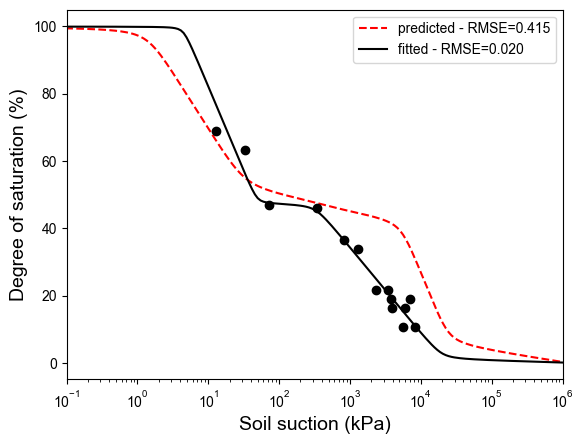

In [54]:
list_rmse_rna = []
list_rmse_exp = []

list_point_pred_test = []
list_point_ajus_test = []

for i in range(0, len(coef)):

    suc_exp = points_ccsa[points_ccsa['Código']==work_id[i]]['Suc (kPa)'].values
    sat_exp = points_ccsa[points_ccsa['Código']==work_id[i]]['Sat'].values/100

    
    new_bim = BimodalSWCC(suc=suc_exp, sat=sat_exp)
    
    rmse_rna = new_bim.objective(predValues[i])
    rmse_exp = new_bim.objective(coef[i])

    list_rmse_rna.append(rmse_rna)
    list_rmse_exp.append(rmse_exp)

    plt.clf()

    fig, ax = plt.subplots()

    ax.plot(x_value, bim.saturationCalcule(x_value, predValues[i])*100, label=f"predicted - RMSE={rmse_rna:.3f}", color="red", linestyle="--")
    ax.plot(x_value, bim.saturationCalcule(x_value, coef[i])*100, label=f"fitted - RMSE={rmse_exp:.3f}", color="black")

    list_point_pred_test.append(bim.saturationCalcule(x_value, predValues[i]))
    list_point_ajus_test.append(bim.saturationCalcule(x_value, coef[i]))

    ax.scatter(suc_exp, sat_exp*100, color="black", zorder=2)

    ax.set_ylabel("Degree of saturation (%)", fontsize=14)
    ax.set_xlabel("Soil suction (kPa)", fontsize=14)

    plt.xlim(0.1, 10**6)

    plt.xscale("log")

    plt.legend()

    plt.savefig(f"Versões RNA/test/v2/curve{i}.svg")

In [57]:
predValues[0]

array([5.088076114654541, 17.07508659362793, 0.41658681631088257,
       10313.017578125, 0.3200607895851135, 10523.1162109375,
       0.026924170553684235, 0.05], dtype=object)

In [58]:
list_sat_pred = []
list_sat_ajus = []
list_sat_expe = []

for i in range(0, len(coef)):

    suc_exp = points_ccsa[points_ccsa['Código']==work_id[i]]['Suc (kPa)'].values
    sat_exp = points_ccsa[points_ccsa['Código']==work_id[i]]['Sat'].values/100

    list_sat_expe.append(sat_exp)
    list_sat_pred.append(bim.saturationCalcule(suc_exp, predValues[i][0:]))
    list_sat_ajus.append(bim.saturationCalcule(suc_exp, coef[i]))

c:\Users\savio\OneDrive\Faculdade\TCC\Base de Dados\Solver\BimodalSWCC.py:100: RuntimeWarning: overflow encountered in power
  part3 = (s3 - s4) / (1 + ((suction / np.sqrt(suc3a * suc4a)) ** d3))


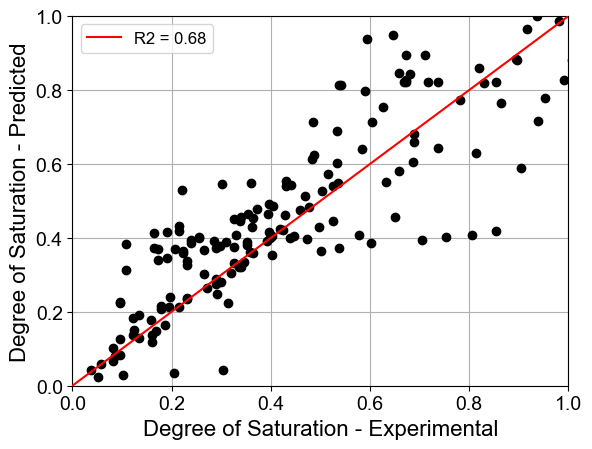

In [59]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()

r2 = r2_score(np.concatenate(list_sat_expe), np.concatenate(list_sat_pred))

ax.scatter(np.concatenate(list_sat_expe), np.concatenate(list_sat_pred), color='black', zorder=3)

ax.plot(
    np.linspace(0,1,20),
    np.linspace(0,1,20),
    zorder=3, color="red", label=f"R2 = {r2:.2f}"
)


ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.grid("both")
ax.set_xlabel("Degree of Saturation - Experimental", fontsize=16)
ax.set_ylabel("Degree of Saturation - Predicted", fontsize=16)

ax.legend(fontsize=12)

plt.savefig("Exp_Pred_Test.svg")

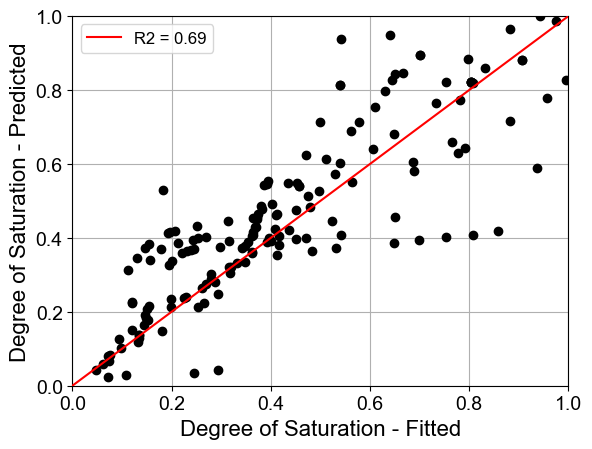

In [60]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()

r2 = r2_score(np.concatenate(list_sat_ajus), np.concatenate(list_sat_pred))

ax.scatter(np.concatenate(list_sat_ajus), np.concatenate(list_sat_pred), color='black', zorder=3)

ax.plot(
    np.linspace(0,1,20),
    np.linspace(0,1,20),
    zorder=3, color="red", label=f"R2 = {r2:.2f}"
)


ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.grid("both")
ax.set_xlabel("Degree of Saturation - Fitted", fontsize=16)
ax.set_ylabel("Degree of Saturation - Predicted", fontsize=16)

ax.legend(fontsize=12)

plt.savefig("Fit_Pred_Test.svg")

In [52]:
dfResults['RMSE_PRED'] = list_rmse_rna
dfResults['RMSE_AJUS'] = list_rmse_exp

dfResults.to_excel("Result_test.xlsx")

In [50]:
sucTrainPrev = np.exp(trainPrev1*max_valueSuc)

dic_train = {"código":train_dataset["CCSA"].values,
    "yb1":sucTrainPrev[:,0],
    "yres1":sucTrainPrev[:,1],
    "sres1":trainPrev2[:,0],
    "yb2":sucTrainPrev[:,2],
    "sb":trainPrev2[:,1],
    "yres2":sucTrainPrev[:,3],
    "sres2":trainPrev2[:,2],
    "a":np.ones(len(trainPrev1[:,0]))*0.06
}

predValues_train = pd.DataFrame(dic_train).values

dfResultsTrain = pd.DataFrame(dic_train)

coef_train = train_dataset.iloc[:, 11:].values

work_id_train = train_dataset['CCSA'].values

In [ ]:
list_rmse_exp_train = []
list_rmse_rna_train = []
list_point_pred_train = []
list_point_ajus_train = []

for i in range(0, len(coef_train)):

    suc_exp = points_ccsa[points_ccsa['Código']==work_id_train[i]]['Suc (kPa)'].values
    sat_exp = points_ccsa[points_ccsa['Código']==work_id_train[i]]['Sat'].values/100

    
    new_bim = BimodalSWCC(suc=suc_exp, sat=sat_exp)
    
    rmse_rna = new_bim.objective(predValues_train[i])
    rmse_exp = new_bim.objective(coef_train[i])

    list_rmse_rna_train.append(rmse_rna)
    list_rmse_exp_train.append(rmse_exp)

    plt.clf()

    fig, ax = plt.subplots()

    ax.plot(x_value, bim.saturationCalcule(x_value, predValues_train[i])*100, label=f"predicted - RMSE={rmse_rna:.3f}", color="red", linestyle="--")
    ax.plot(x_value, bim.saturationCalcule(x_value, coef_train[i])*100, label=f"fitted - RMSE={rmse_exp:.3f}", color="black")

    list_point_pred_train.append(bim.saturationCalcule(x_value, predValues_train[i]))
    list_point_ajus_train.append(bim.saturationCalcule(x_value, coef_train[i]))

    ax.scatter(suc_exp, sat_exp*100, color="black", zorder=2)

    ax.set_ylabel("Degree of saturation (%)", fontsize=14)
    ax.set_xlabel("Soil suction (kPa)", fontsize=14)

    plt.xlim(0.1, 10**6)

    plt.xscale("log")

    plt.legend()

    plt.savefig(f"train/v2/curve{i}.jpeg")

In [52]:
list_sat_ajus_train = []
list_sat_pred_train = []
list_sat_expe_train = []

for i in range(0, len(coef_train)):

    suc_exp = points_ccsa[points_ccsa['Código']==work_id_train[i]]['Suc (kPa)'].values
    sat_exp = points_ccsa[points_ccsa['Código']==work_id_train[i]]['Sat'].values/100

    list_sat_expe_train.append(sat_exp)
    list_sat_ajus_train.append(bim.saturationCalcule(suc_exp, coef_train[i]))
    list_sat_pred_train.append(bim.saturationCalcule(suc_exp, predValues_train[i][1:]))

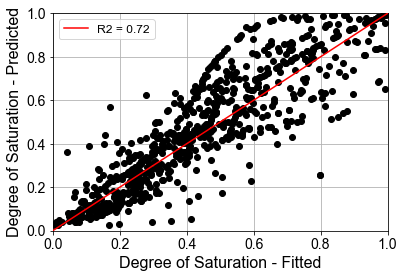

In [53]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()

r2 = r2_score(np.concatenate(list_sat_ajus_train), np.concatenate(list_sat_pred_train))

ax.scatter(np.concatenate(list_sat_ajus_train), np.concatenate(list_sat_pred_train), color='black', zorder=3)

ax.plot(
    np.linspace(0,1,20),
    np.linspace(0,1,20),
    zorder=3, color="red", label=f"R2 = {r2:.2f}"
)


ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.grid("both")
ax.set_xlabel("Degree of Saturation - Fitted", fontsize=16)
ax.set_ylabel("Degree of Saturation - Predicted", fontsize=16)

ax.legend(fontsize=12)

plt.savefig("Fit_Pred_Train.svg")

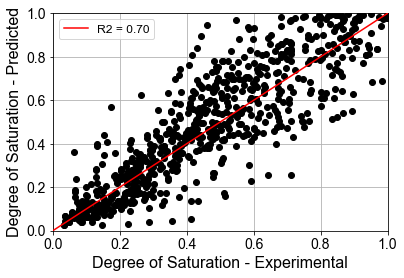

In [54]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots()

r2 = r2_score(np.concatenate(list_sat_expe_train), np.concatenate(list_sat_pred_train))

ax.scatter(np.concatenate(list_sat_expe_train), np.concatenate(list_sat_pred_train), color='black', zorder=3)

ax.plot(
    np.linspace(0,1,20),
    np.linspace(0,1,20),
    zorder=3, color="red", label=f"R2 = {r2:.2f}"
)


ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.grid("both")
ax.set_xlabel("Degree of Saturation - Experimental", fontsize=16)
ax.set_ylabel("Degree of Saturation - Predicted", fontsize=16)

ax.legend(fontsize=12)

plt.savefig("Exp_Pred_Train.svg")

In [57]:
dfResultsTrain['RMSE_PRED'] = list_rmse_rna_train
dfResultsTrain['RMSE_AJUS'] = list_rmse_exp_train

dfResultsTrain.to_excel("Result_train.xlsx")

In [58]:
model_bim_sat1.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 6) dtype=float32, numpy=
 array([[ 0.35957575, -0.09781273,  0.30344608,  0.56512964, -0.06740998,
          0.17541918],
        [-0.260768  ,  0.58447766,  0.4352856 , -0.0716624 , -0.19414355,
         -0.48853526],
        [ 0.26219895,  0.0373487 ,  0.63848937, -0.33901203, -0.43470952,
         -0.09928873],
        [-0.07197388, -0.01811506, -0.65530103, -0.12945779,  0.4633973 ,
         -0.34361812],
        [ 0.07052764, -0.48150703,  0.16635771,  0.4705903 ,  0.18067032,
          0.03217474],
        [-0.21187621, -0.00628034, -0.61166614,  0.2802396 ,  0.8519204 ,
         -0.14229736],
        [-0.46429002,  0.4854104 , -0.11342737,  0.5023974 ,  0.6524802 ,
         -0.35231316],
        [-0.20127073,  0.41799977, -0.49182117, -0.1701476 , -0.3533037 ,
          0.38254458]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.10060961, -0.11209323, -0.0965373 , -0.02329757,  0.12718977,
     